In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

import sidetable
#df.stb.freq(['City'], style=True)

Randomized search

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler

In [3]:
#Experimental data
data = pd.read_table('datas.txt') 
data.describe()

,WD,WFS,TS,P,ME
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.954667,95.451333,8.326533,1819.171733,0.445693
std,0.172653,53.012550,5.220140,757.431591,0.055220
min,0.800000,28.000000,1.660000,531.220000,0.307000
25%,0.800000,54.585000,4.450000,1171.550000,0.411000
50%,0.800000,80.330000,6.670000,1798.200000,0.445000
75%,1.200000,123.250000,10.980000,2435.315000,0.491500
max,1.200000,222.500000,25.000000,3266.550000,0.553000


In [4]:
data.columns

Index(['WD', 'WFS', 'TS', 'P', 'ME'], dtype='object')

In [5]:
x= data[['WD', 'WFS', 'TS', 'P']]
y= data[['ME']]

### Preprocession steps

|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

In [6]:
data.isnull().sum()

WD     0
WFS    0
TS     0
P      0
ME     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WD      75 non-null     float64
 1   WFS     75 non-null     float64
 2   TS      75 non-null     float64
 3   P       75 non-null     float64
 4   ME      75 non-null     float64
dtypes: float64(5)
memory usage: 3.1 KB


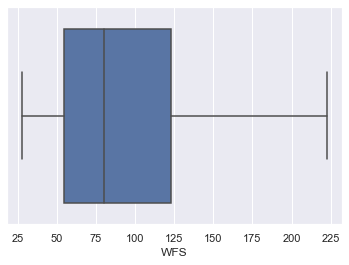

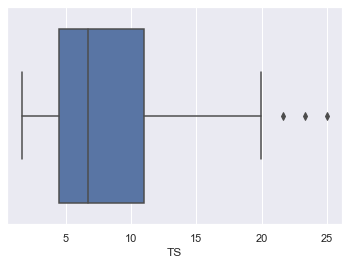

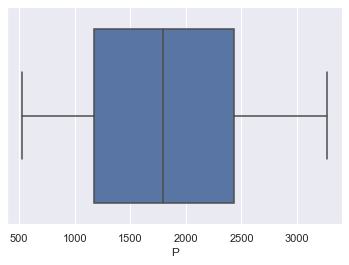

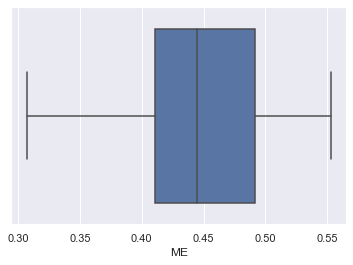

In [8]:
# Plot boxplot to detect outlier
def boxplot(col):
    sns.boxplot(data[col])
    plt.show()

for i in list(data.columns)[1:]:
    boxplot(i)

In [9]:
df= data

<AxesSubplot:xlabel='ME', ylabel='Density'>

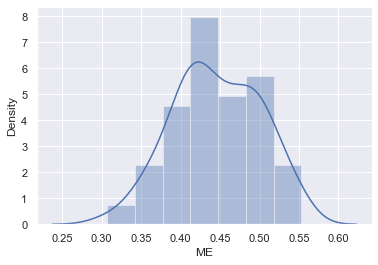

In [10]:
# Check distribution of dependent variable
sns.distplot(df['ME'])

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [12]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= x_scaled

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']= x.columns
vif

,VIF,Features
0,6.147319,WD
1,16.006094,WFS
2,3.691277,TS
3,8.731154,P


VIF>5 for WFS. We should drop it as per rule. But we have not dropped it as per reference file

In [13]:
x= data[['WD', 'TS', 'P']]

In [14]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

## Linear regression

In [15]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     ME   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1448.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    9.68e-54
Time:                        11:54:09   Log-Likelihood:                          92.817
No. Observations:                  60   AIC:                                     -179.6
Df Residuals:                      57   BIC:                                     -173.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WD             0.3124      0.019     16.356      0.000       0.274       0.351
TS             0.0127      0.002      7.844      0.000       0.009       0.016
P           2.042e-05   1.31e-05      1.562      0.124   -5.77e-06    4.66e-05
==============================================================================
Omnibus:                        2.730   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.417
Skew:                          -0.392   Prob(JB):                        0.299
Kurtosis:                       2.406   Cond. No.                     5.53e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p>0.05 for 'P'. We should drop it.

In [16]:
x= data[['WD', 'TS']]

In [17]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [18]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     ME   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2118.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    6.12e-55
Time:                        11:54:09   Log-Likelihood:                          91.561
No. Observations:                  60   AIC:                                     -179.1
Df Residuals:                      58   BIC:                                     -174.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WD             0.3360      0.012     28.557      0.000       0.312       0.360
TS             0.0145      0.001     12.713      0.000       0.012       0.017
==============================================================================
Omnibus:                        4.724   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.586
Skew:                          -0.631   Prob(JB):                        0.101
Kurtosis:                       2.507   Cond. No.                         17.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y_linear_ME= reg_model.predict(x)

df['ME Linear predicted']=y_linear_ME
df

,WD,WFS,TS,P,ME,ME Linear predicted
0,0.8,39.33,5.00,531.22,0.396,0.341184
1,0.8,48.33,6.66,693.84,0.414,0.365202
2,0.8,66.83,8.34,959.70,0.433,0.389510
3,0.8,80.00,10.00,1113.30,0.446,0.413529
4,0.8,94.33,11.67,1277.70,0.445,0.437692
...,...,...,...,...,...,...
70,1.2,44.33,3.34,1688.92,0.372,0.451585
71,1.2,57.33,4.17,1996.29,0.446,0.463594
72,1.2,70.00,5.01,2177.65,0.488,0.475748
73,1.2,80.17,5.83,2528.29,0.470,0.487613


- All checks are Ok. 
- So, Linear regression model is good for prediction.